In [1]:
import pandas as pd

df = pd.read_csv('../data/Hive17.csv', sep=";")
df = df.dropna()
df

,Hour,DateTime,T17,RH17,AT17,Tamb,RHamb,ATamb,T17-Tamb,AT17-ATamb
0,1,21.08.2021 14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5
1,2,21.08.2021 15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6
2,3,21.08.2021 16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9
3,4,21.08.2021 17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3
4,5,21.08.2021 18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4
...,...,...,...,...,...,...,...,...,...,...
1842,1843,6.11.2021 08:00,15.9,77,16.5,13.1,100,14.1,2.8,2.4
1843,1844,6.11.2021 09:00,16.3,77,17.0,15.3,87,16.3,1.0,0.8
1844,1845,6.11.2021 10:00,17.2,79,18.3,18.9,68,19.8,-1.7,-1.5
1845,1846,6.11.2021 11:00,19.4,81,21.4,21.5,56,22.2,-2.1,-0.8


In [2]:
from statsmodels.tsa.seasonal import STL

stl = STL(df["T17"], period=24, robust=True) 
result = stl.fit()

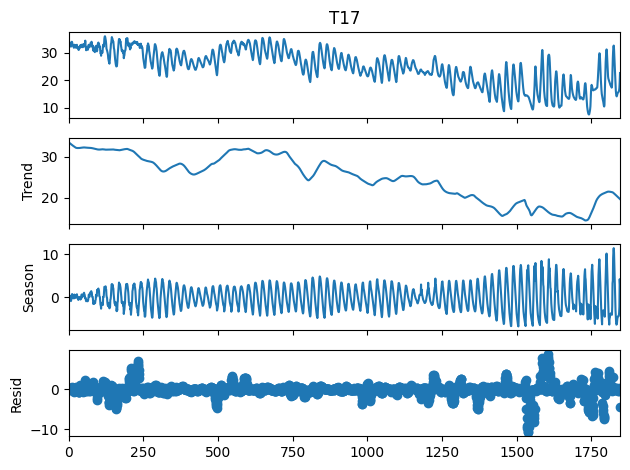

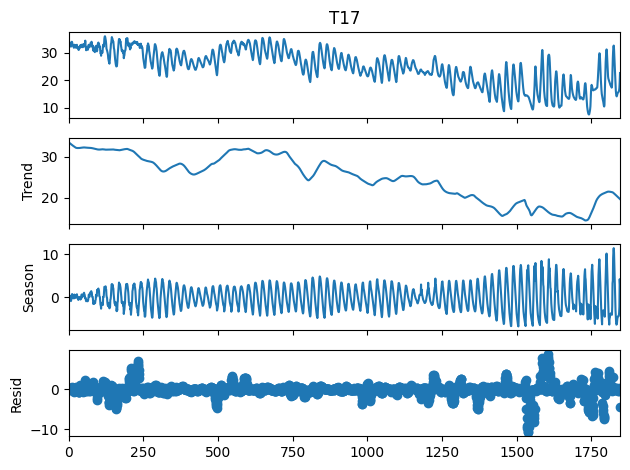

In [3]:
result.plot()

<Axes: ylabel='Frequency'>

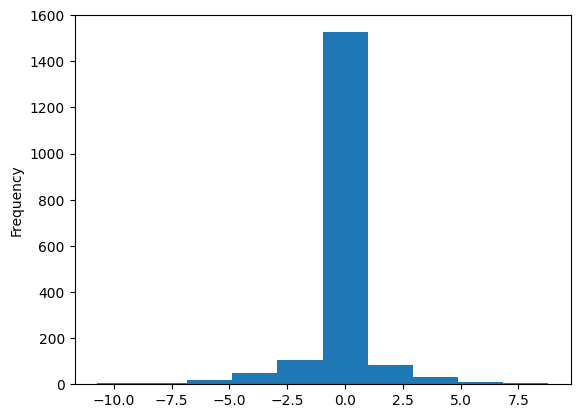

In [4]:
result.resid.plot.hist()

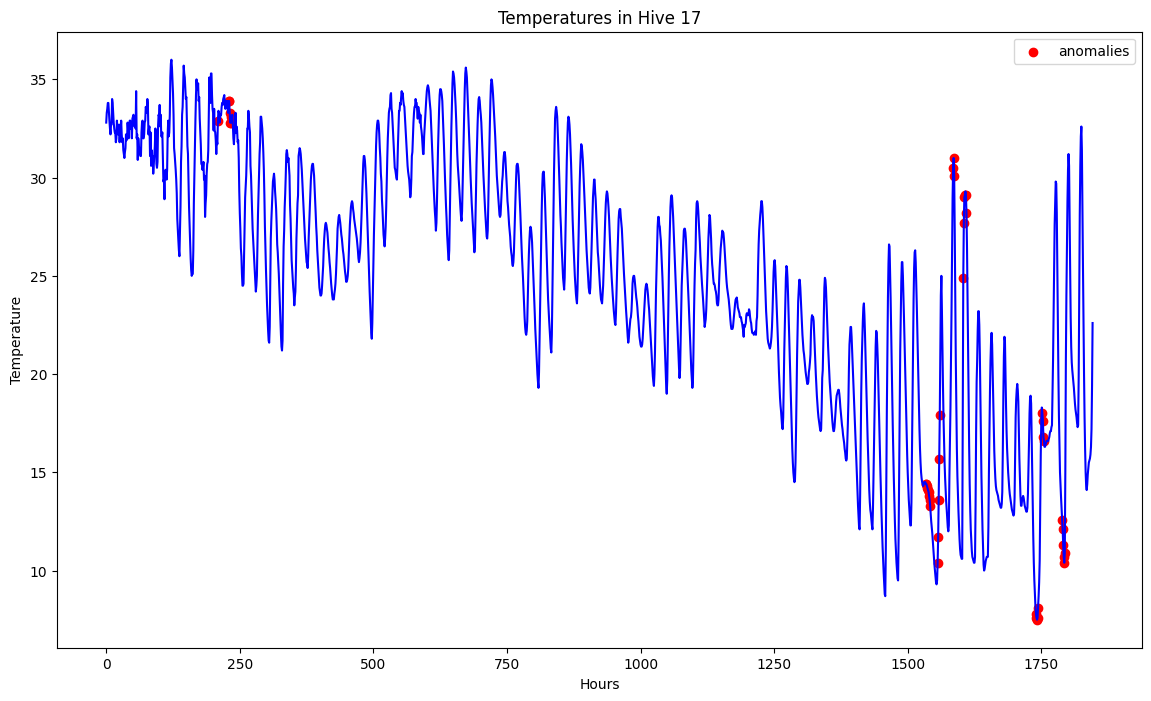

In [5]:
import matplotlib.pyplot as plt

threshold = 5
anomalies_filter = result.resid.apply(lambda x: True if abs(x) > threshold else False)
anomalies = df["T17"][anomalies_filter]

plt.figure(figsize=(14, 8))
plt.scatter(x=anomalies.index, y=anomalies, color="red", label="anomalies")
plt.plot(df.index, df['T17'], color='blue')
plt.title('Temperatures in Hive 17')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.show()